## library yang dipakai

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
# Membaca Dataset
df = pd.read_csv('Mall_Customers.csv')

In [17]:
# membaca 5 baris pertama 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data preparation

In [18]:
# rename kolom
df.rename(index=str, columns={
    'Annual Income (k$)' : 'Income',
    'Spending Score (1-100)' : 'Score'
}, inplace = True)

df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Drop colomn yang tidak digunakan
X = df.drop(['CustomerID', 'Gender'], axis=1)
# menghapus colomn customer dan gender 


In [20]:
print(X)
# jadi bisa diartikan dia membuentuk variable X dan memasukkan value dataset kecuali colomn customer dan gender

     Age  Income  Score
0     19      15     39
1     21      15     81
2     20      16      6
3     23      16     77
4     31      17     40
..   ...     ...    ...
195   35     120     79
196   45     126     28
197   32     126     74
198   32     137     18
199   30     137     83

[200 rows x 3 columns]


# Menentukan Jumlah cluster berdasarkan elbow

In [21]:
# pengertian

# Dalam konteks algoritma K-Means, metode "elbow" (siku) digunakan untuk membantu menentukan jumlah kluster yang optimal untuk suatu dataset. Konsepnya adalah mencari titik pada grafik di mana penambahan kluster tidak memberikan penurunan signifikan dalam nilai inersia.

# Inersia (inertia) mengukur sejauh mana titik-titik data dalam setiap kluster berada dalam jarak yang dekat dengan pusat kluster. Tujuan dari algoritma K-Means adalah mengurangi inersia dengan menemukan lokasi pusat kluster yang optimal untuk meminimalkan jarak antara titik-titik data dan pusat kluster.



C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Administrator\AppData\Local\Programs\Python\Python31

Text(5, 150000, 'Possible elbow point')

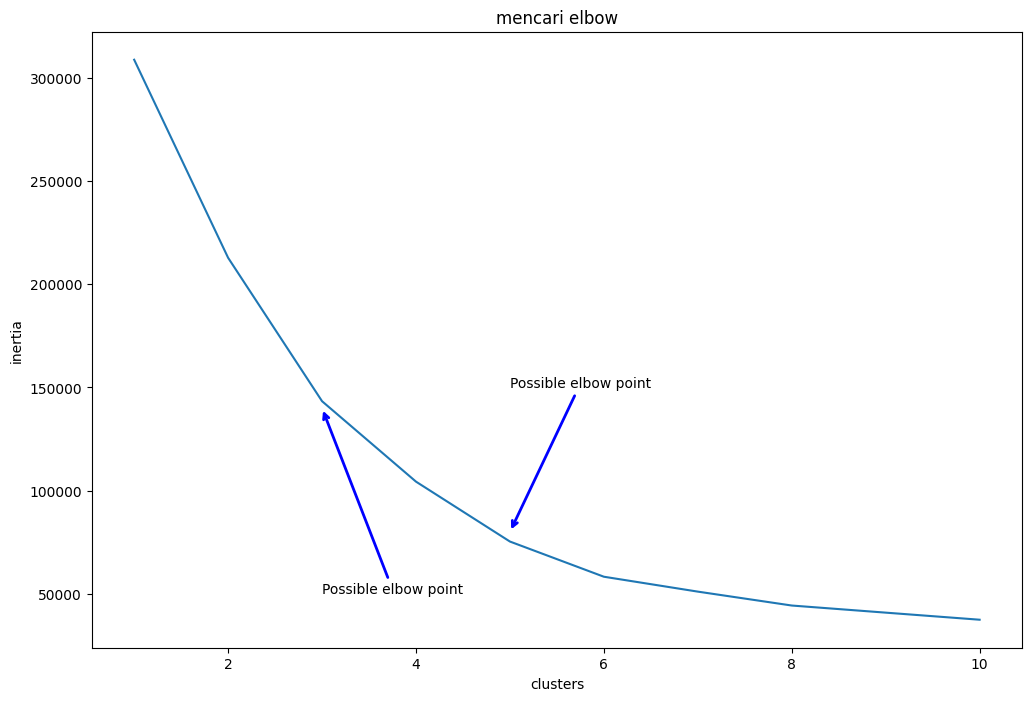

In [22]:
# untuk menentukan berapa cluster yang akan digunakan atau di pakai
# paling afdol tuh menggunakan elbow untuk menentukannya 
# dan memilih elbow yang berada di tengah2 atau mencari nilai tengah elbow

clusters=[]
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
# untuk figure / gambar nya

sns.lineplot(x=list(range(1,11)),y=clusters, ax=ax)
# untuk garisnya

ax.set_title('mencari elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# digunakan untuk memberi panah pada elbow
ax.annotate('Possible elbow point', xy=(3, 140000), xytext=(3, 50000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible elbow point', xy=(5, 80000), xytext=(5, 150000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))



# Proses Clustering

In [23]:
# fungsi/tahapan clustering nya
n_clust = 4
kmean = KMeans(n_clusters=n_clust).fit(X)
X['Labels'] = kmean.labels_

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
X

,Age,Income,Score,Labels
0,19,15,39,3
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


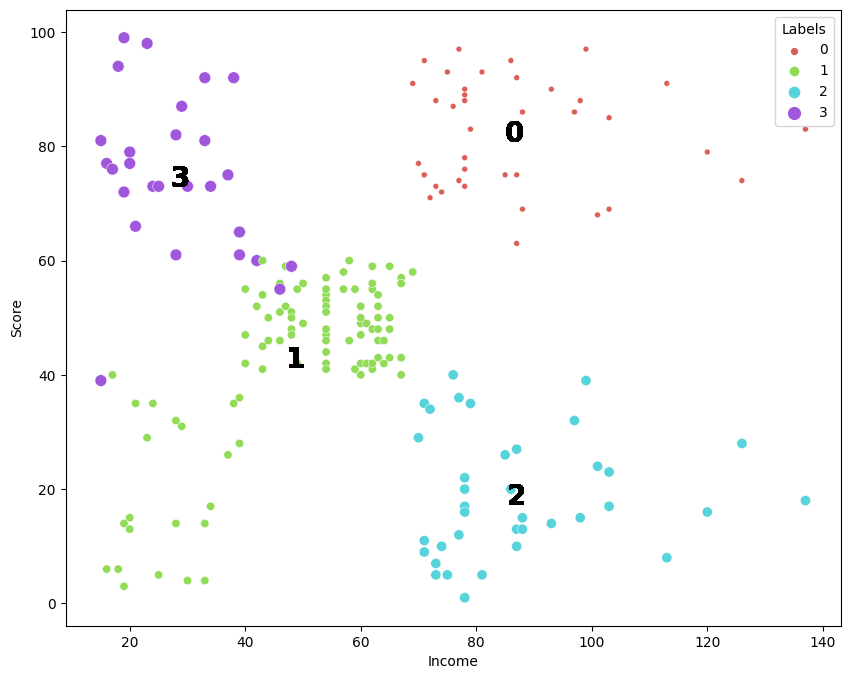

In [25]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], markers=True, size=X['Labels'], palette=sns.color_palette('hls', n_clust))

for label in X['Labels']:
    plt.annotate(label,
                 (X[X['Labels']==label]['Income'].mean(),
                  X[X['Labels']==label]['Score'].mean()),
                  horizontalalignment = 'center',
                  verticalalignment = 'center',
                  size = 20, weight='bold',
                  color ='black')

In [26]:
print(X)

     Age  Income  Score  Labels
0     19      15     39       3
1     21      15     81       3
2     20      16      6       1
3     23      16     77       3
4     31      17     40       1
..   ...     ...    ...     ...
195   35     120     79       0
196   45     126     28       2
197   32     126     74       0
198   32     137     18       2
199   30     137     83       0

[200 rows x 4 columns]


In [27]:
# di ekspor ke csv

X.to_csv("output_cluster.csv")